# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [87]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [89]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [92]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [94]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [95]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [96]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [100]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [102]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


C:\Users\Bill\AppData\Local\Temp\ipykernel_8156\1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [104]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


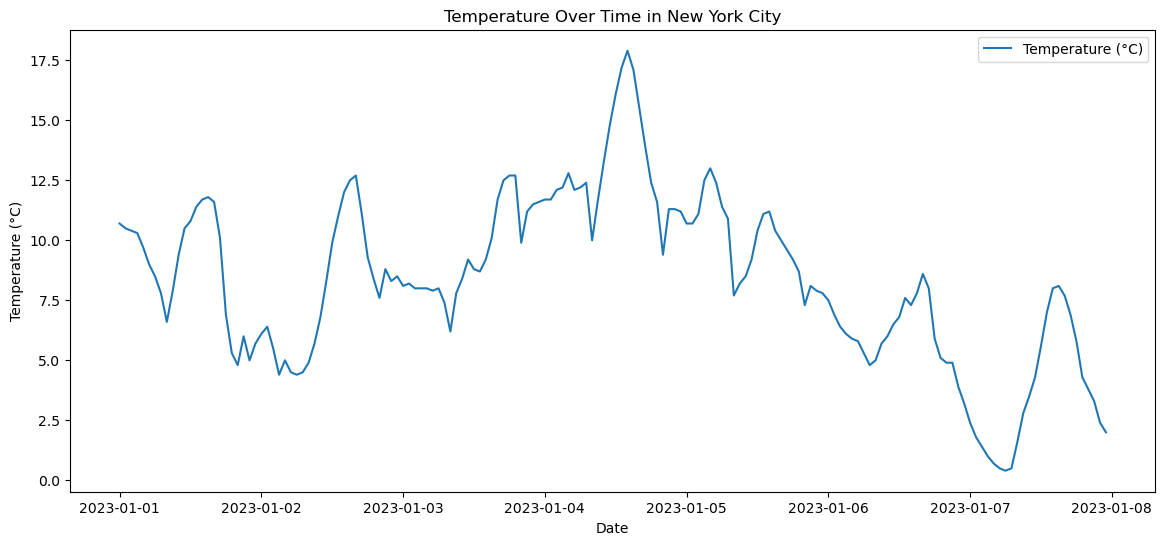

In [106]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

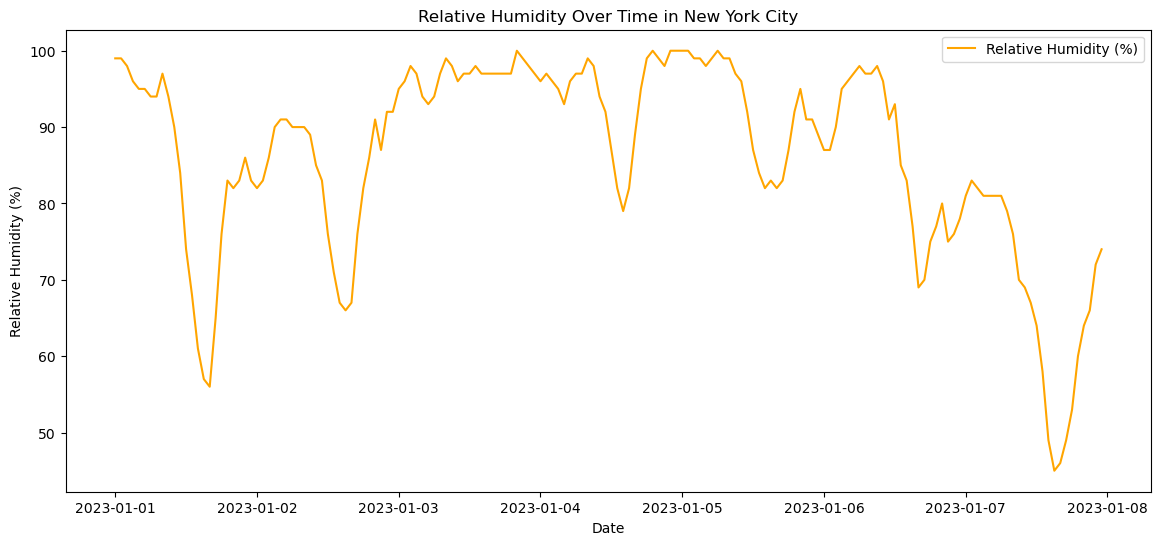

In [108]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


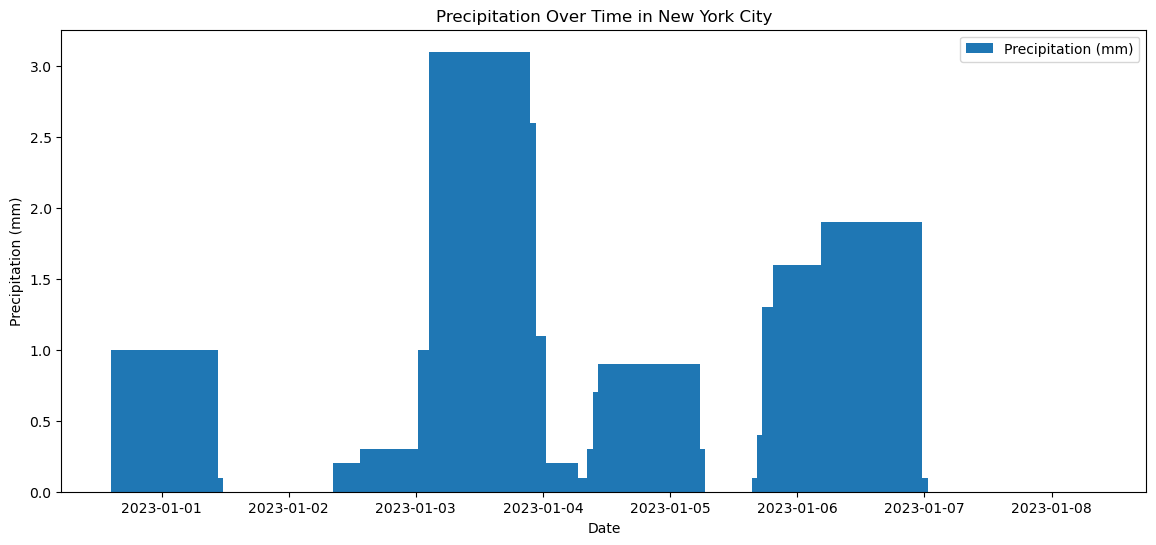

In [110]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [111]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


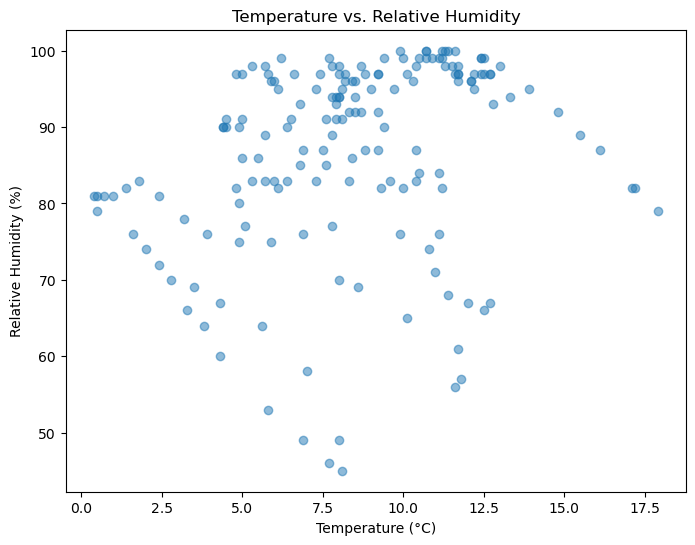

In [114]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [115]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


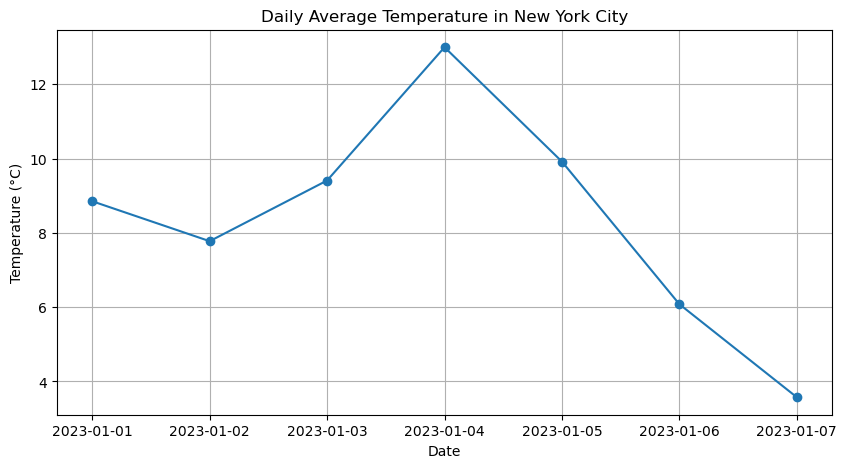

In [118]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [120]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


C:\Users\Bill\AppData\Local\Temp\ipykernel_8156\4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [121]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [123]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


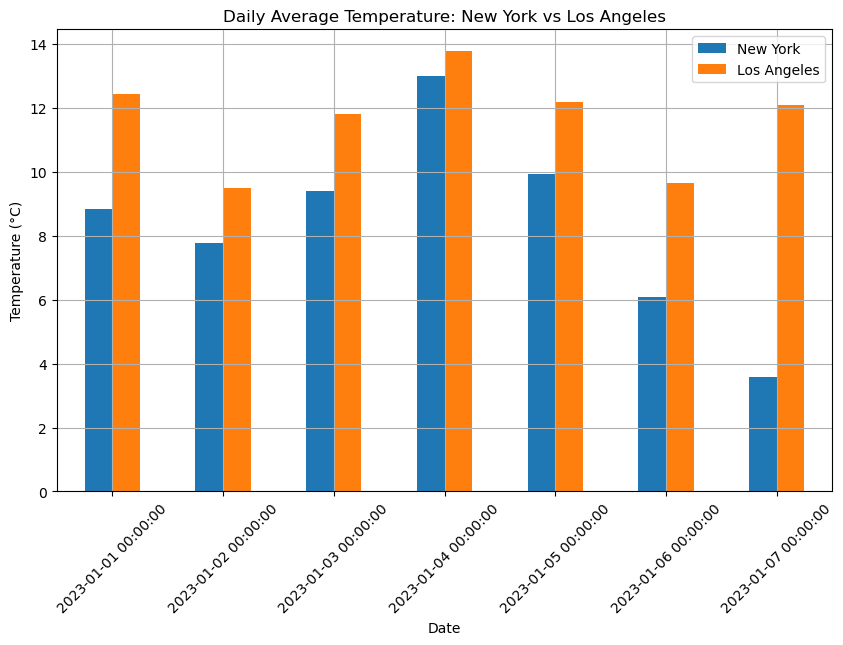

In [126]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [128]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [130]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
# Step 1: Define Parameters for Extended Date Range and Variables
latitude_nyc = 40.7128
longitude_nyc = -74.0060
start_date = '2022-01-01'
end_date = '2022-12-31'

In [6]:
# Additional Variables: Wind Speed and Atmospheric Pressure
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation', 'windspeed_10m', 'pressure_msl']
base_url = 'https://archive-api.open-meteo.com/v1/archive'

In [8]:
params_nyc = {
    'latitude': latitude_nyc,
    'longitude': longitude_nyc,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

In [10]:
# Fetch Data for New York City
response_nyc = requests.get(base_url, params=params_nyc)
if response_nyc.status_code == 200:
    print('New York City data fetched successfully!')
else:
    raise Exception(f"Failed to fetch New York City data. Status Code: {response_nyc.status_code}")

data_nyc = response_nyc.json()
df_nyc = pd.DataFrame(data_nyc['hourly'])

New York City data fetched successfully!


In [12]:
# Step 2: Data Cleaning for New York City
df_nyc['time'] = pd.to_datetime(df_nyc['time'])
df_nyc.set_index('time', inplace=True)
df_nyc.fillna(method='ffill', inplace=True)

C:\Users\Bill\AppData\Local\Temp\ipykernel_20376\1053154974.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_nyc.fillna(method='ffill', inplace=True)


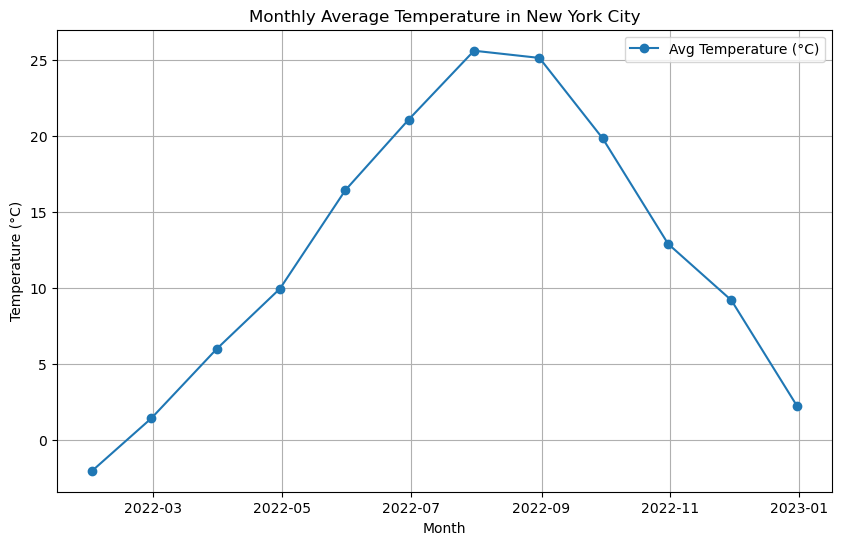

In [16]:
# Step 3: Seasonal Trends Visualization
monthly_avg_temp = df_nyc['temperature_2m'].resample('M').mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp, marker='o', label='Avg Temperature (°C)')
plt.title('Monthly Average Temperature in New York City')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

Extended New York City data fetched successfully!


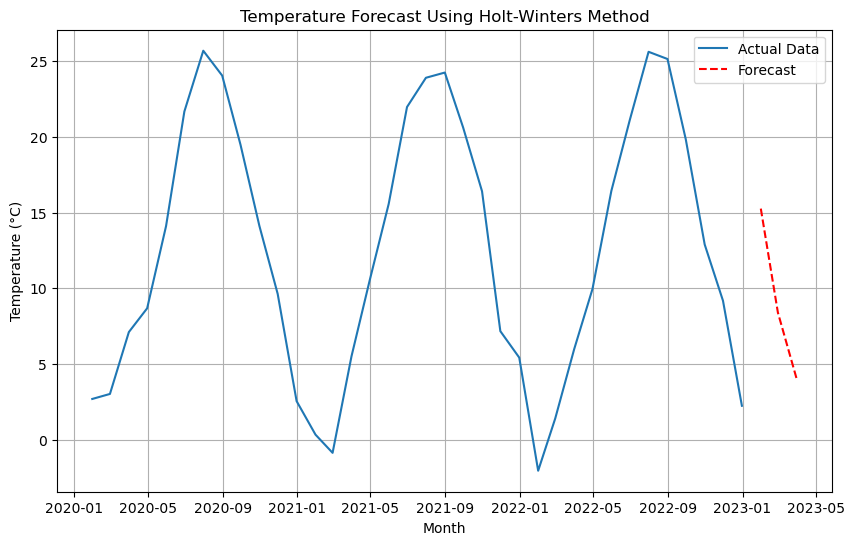

In [44]:
# Import required libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 4: Forecasting Temperature with Extended Data and Proper Initialization

# Extend the date range to ensure sufficient data for seasonal cycles
start_date = '2020-01-01'  # Start three years before the end date
end_date = '2022-12-31'    # End at December 31, 2022

# Base URL for the weather API
base_url = 'https://archive-api.open-meteo.com/v1/archive'

# Fetch extended data for New York City
params_nyc_extended = {
    'latitude': 40.7128,
    'longitude': -74.0060,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': 'temperature_2m',
    'timezone': 'America/New_York'
}

response_nyc_extended = requests.get(base_url, params=params_nyc_extended)

if response_nyc_extended.status_code == 200:
    print('Extended New York City data fetched successfully!')
else:
    raise Exception(f"Failed to fetch extended data. Status Code: {response_nyc_extended.status_code}")

# Load the extended data into a DataFrame
data_nyc_extended = response_nyc_extended.json()
df_nyc_extended = pd.DataFrame(data_nyc_extended['hourly'])

# Data Cleaning for Extended Data
df_nyc_extended['time'] = pd.to_datetime(df_nyc_extended['time'])
df_nyc_extended.set_index('time', inplace=True)

# Replace deprecated `fillna` method usage
df_nyc_extended.ffill(inplace=True)

# Resample data to Monthly Averages
monthly_avg_temp_extended = df_nyc_extended['temperature_2m'].resample('M').mean()

# Check if the data spans at least two full seasonal cycles (24 months)
if len(monthly_avg_temp_extended) < 24:
    raise ValueError("Insufficient data: Requires at least 24 months of data for seasonal forecasting.")

# Training Data: Use all but the last 3 months for testing
train_data = monthly_avg_temp_extended[:-3]

# Initialize Holt-Winters Model with Proper Initialization
model = ExponentialSmoothing(
    train_data,
    seasonal='add',  # Additive seasonality
    seasonal_periods=12,  # Assuming monthly data with yearly seasonal trends
    initialization_method="estimated"  # Proper initialization method
)

# Fit the Model
fitted_model = model.fit()

# Forecast for the Next 3 Months
forecast = fitted_model.forecast(3)

# Visualization of the Forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_temp_extended.index, monthly_avg_temp_extended, label='Actual Data')
forecast_index = pd.date_range(monthly_avg_temp_extended.index[-1] + pd.offsets.MonthBegin(), periods=3, freq='M')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='red')
plt.title('Temperature Forecast Using Holt-Winters Method')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

London data fetched successfully!
Seattle data fetched successfully!


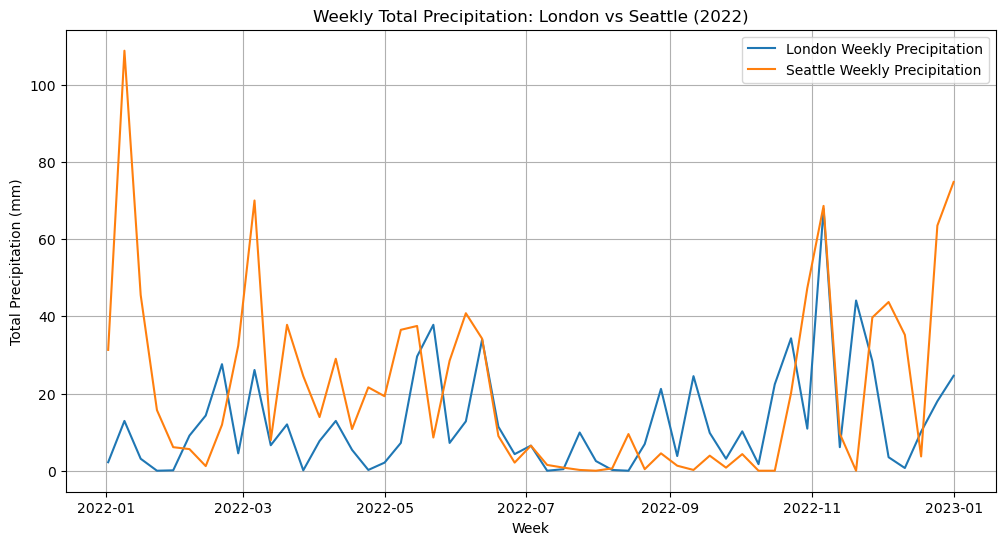

In [48]:
# Step 5: Compare Weekly Precipitation Between London and Seattle

# Define cities and their coordinates
cities = {
    'London': (51.5074, -0.1278),  # London coordinates
    'Seattle': (47.6062, -122.3321)  # Seattle coordinates
}

# Initialize a dictionary to store weekly precipitation data for each city
weekly_precipitation = {}

# Loop through each city to fetch precipitation data
for city, (lat, lon) in cities.items():
    # Define parameters for API request
    params = {
        'latitude': lat,
        'longitude': lon,
        'start_date': '2022-01-01',  # Start of 2022
        'end_date': '2022-12-31',    # End of 2022
        'hourly': 'precipitation',   # Fetch hourly precipitation data
        'timezone': 'auto'           # Automatically adjust timezone
    }

    # Make the API request
    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        print(f'{city} data fetched successfully!')
        data = response.json()
        df_city = pd.DataFrame(data['hourly'])  # Load data into a DataFrame
        
        # Data cleaning for each city
        df_city['time'] = pd.to_datetime(df_city['time'])  # Convert 'time' to datetime
        df_city.set_index('time', inplace=True)           # Set 'time' as the index
        df_city.ffill(inplace=True)  # Forward fill to handle missing values

        # Resample data to weekly totals
        weekly_precipitation[city] = df_city['precipitation'].resample('W').sum()
    else:
        print(f'Failed to fetch data for {city}. Status Code: {response.status_code}')

# Plot Weekly Precipitation for London and Seattle
plt.figure(figsize=(12, 6))
for city, weekly_data in weekly_precipitation.items():
    plt.plot(weekly_data.index, weekly_data, label=f'{city} Weekly Precipitation')

plt.title('Weekly Total Precipitation: London vs Seattle (2022)')
plt.xlabel('Week')
plt.ylabel('Total Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Step 6: Analysis of Total Rainfall
total_rainfall = {city: data.sum() for city, data in weekly_precipitation.items()}
print('Total Rainfall in 2022:')
for city, rainfall in total_rainfall.items():
    print(f'{city}: {rainfall:.2f} mm')

Total Rainfall in 2022:
London: 662.80 mm
Seattle: 1131.20 mm


In [ ]:
Seattle had more rainfall!

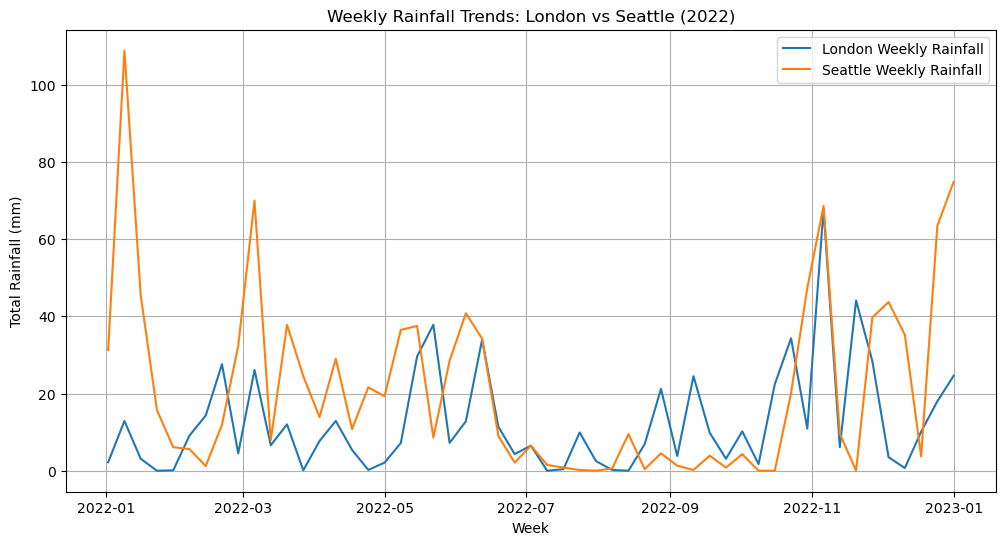

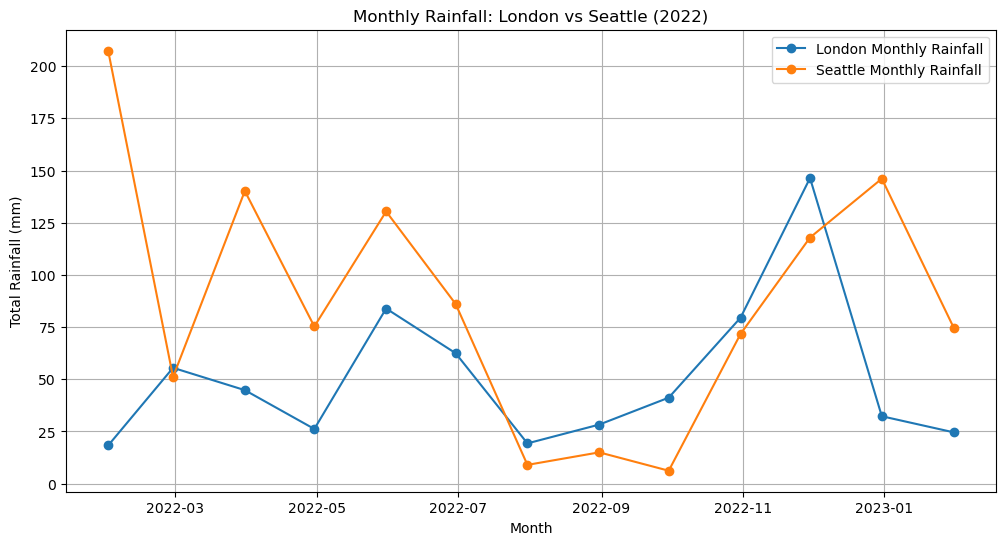

London: Maximum weekly rainfall was 67.80 mm during the week of 2022-11-06.
Seattle: Maximum weekly rainfall was 108.80 mm during the week of 2022-01-09.
Correlation between weekly rainfall in London and Seattle: 0.30


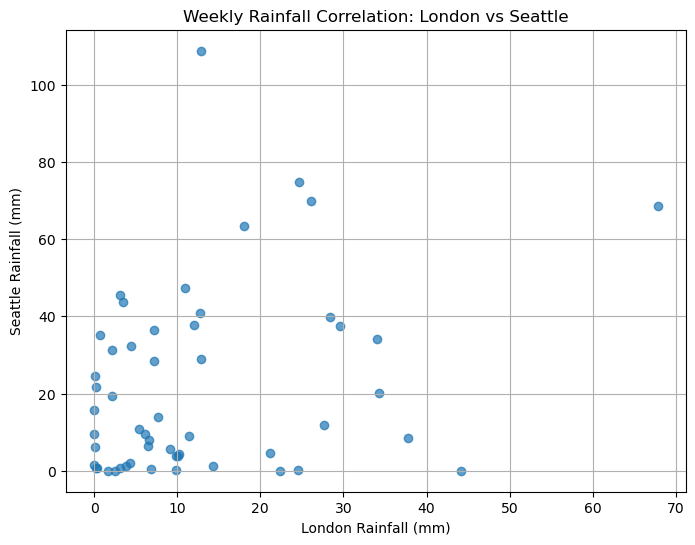

In [50]:
# Step 7: Visualizing Weekly Rainfall Trends
plt.figure(figsize=(12, 6))
for city, weekly_data in weekly_precipitation.items():
    plt.plot(weekly_data.index, weekly_data, label=f'{city} Weekly Rainfall')
plt.title('Weekly Rainfall Trends: London vs Seattle (2022)')
plt.xlabel('Week')
plt.ylabel('Total Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Step 7.1: Monthly Aggregation to Detect Seasonal Patterns
monthly_precipitation = {}
for city, weekly_data in weekly_precipitation.items():
    # Resample weekly data to monthly totals
    monthly_precipitation[city] = weekly_data.resample('M').sum()

# Plot Monthly Rainfall
plt.figure(figsize=(12, 6))
for city, monthly_data in monthly_precipitation.items():
    plt.plot(monthly_data.index, monthly_data, marker='o', label=f'{city} Monthly Rainfall')
plt.title('Monthly Rainfall: London vs Seattle (2022)')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Step 7.2: Identifying Rainfall Extremes
for city, weekly_data in weekly_precipitation.items():
    max_rainfall = weekly_data.max()
    max_rainfall_week = weekly_data.idxmax()
    print(f'{city}: Maximum weekly rainfall was {max_rainfall:.2f} mm during the week of {max_rainfall_week.date()}.')

# Step 7.3: Correlation Analysis Between Cities
# Combine weekly rainfall data from both cities into a single DataFrame
combined_rainfall = pd.DataFrame({
    'London': weekly_precipitation['London'],
    'Seattle': weekly_precipitation['Seattle']
})

# Drop NaN values (if any)
combined_rainfall.dropna(inplace=True)

# Calculate the correlation
correlation = combined_rainfall['London'].corr(combined_rainfall['Seattle'])
print(f'Correlation between weekly rainfall in London and Seattle: {correlation:.2f}')

# Visualize the Correlation (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(combined_rainfall['London'], combined_rainfall['Seattle'], alpha=0.7)
plt.title('Weekly Rainfall Correlation: London vs Seattle')
plt.xlabel('London Rainfall (mm)')
plt.ylabel('Seattle Rainfall (mm)')
plt.grid(True)
plt.show()